In this Project we are going to make a model that predict the digit or numbers which are hard to understand or high in numbers. In this we have taken the inbuilt dataset of keras Mnist. 

This Dataset is consist of training set with 60k images and test set with 10k images in the form of 28*28 pixels.


In [1]:
# Importing the tensorflow:
import tensorflow.keras as keras
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
# Importing the keras packakes
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


#Python basic libraries for machine learning:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

#Library & tools for model improvement and evaluation:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
#Training set in the form of array
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
#Training set in the form of array of labels
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
# Changing the shape training set to 2-dimensional
X_train =np.array(X_train)
X_train = X_train.reshape(X_train.shape[0], -1)

y_train=np.array(y_train)

print(X_train.shape, y_train.shape)

(60000, 784) (60000,)


In [7]:
# Changing the shape test set to 2-dimensional
X_test =np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], -1)

y_test=np.array(y_test)

print(X_test.shape, y_test.shape)

(10000, 784) (10000,)


In [8]:
#Normalizing the dataset to bring in the range of 0 & 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
#Converitng the arrays to dataframes to process in the models
A_train= pd.DataFrame(X_train)
b_train = pd.DataFrame(y_train)


In [10]:
#Training set as dataframe
A_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.004418,-0.005755,-0.004083,-0.004083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.004083,-0.00471,-0.008799,-0.011591,-0.014759,-0.019285,-0.024672,-0.029071,...,-0.135433,-0.116480,-0.093951,-0.072577,-0.052364,-0.036383,-0.021503,-0.013019,-0.004494,-0.004083,0.0,0.0,0.0,0.0,0.0,0.0,-0.00579,-0.009054,-0.016005,-0.02212,-0.026846,-0.031845,-0.043748,-0.047283,-0.053139,-0.056623,-0.060338,-0.056295,-0.051367,-0.042632,-0.033171,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.004418,-0.005755,-0.004083,-0.004083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.004083,-0.00471,-0.008799,-0.011591,-0.014759,-0.019285,-0.024672,-0.029071,...,-0.135433,-0.116480,-0.093951,-0.072577,-0.052364,-0.036383,-0.021503,-0.013019,-0.004494,-0.004083,0.0,0.0,0.0,0.0,0.0,0.0,-0.00579,-0.009054,-0.016005,-0.02212,-0.026846,-0.031845,-0.043748,-0.047283,-0.053139,-0.056623,-0.060338,-0.056295,-0.051367,-0.042632,-0.033171,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.004418,-0.005755,-0.004083,-0.004083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.004083,-0.00471,-0.008799,-0.011591,-0.014759,-0.019285,-0.024672,-0.029071,...,-0.135433,-0.116480,-0.093951,-0.072577,-0.052364,-0.036383,-0.021503,-0.013019,-0.004494,-0.004083,0.0,0.0,0.0,0.0,0.0,0.0,-0.00579,-0.009054,-0.016005,-0.02212,-0.026846,-0.031845,-0.043748,-0.047283,-0.053139,-0.056623,-0.060338,-0.056295,-0.051367,-0.042632,-0.033171,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.004418,-0.005755,-0.004083,-0.004083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.004083,-0.00471,-0.008799,-0.011591,-0.014759,-0.019285,-0.024672,-0.029071,...,-0.135433,-0.116480,-0.093951,-0.072577,-0.052364,-0.036383,-0.021503,-0.013019,-0.004494,-0.004083,0.0,0.0,0.0,0.0,0.0,0.0,-0.00579,-0.009054,-0.016005,-0.02212,-0.026846,-0.031845,-0.043748,-0.047283,-0.053139,-0.056623,-0.060338,-0.056295,-0.051367,-0.042632,-0.033171,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.004418,-0.005755,-0.004083,-0.004083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.004083,-0.00471,-0.008799,-0.011591,-0.014759,-0.019285,-0.024672,-0.029071,...,5.496546,11.208794,2.225606,-0.072577,-0.052364,-0.036383,-0.021503,-0.013019,-0.004494,-0.004083,0.0,0.0,0.0,0.0,0.0,0.0,-0.00579,-0.009054,-0.016005,-0.02212,-0.026846,-0.031845,-0.043748,-0.047283,-0.053139,-0.056623,-0.060338,-0.056295,-0.051367,-0.042632,-0.033171,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0


In [11]:
b_train.head()

,0
0,5
1,0
2,4
3,1
4,9


In [12]:
A_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.004418,-0.005755,-0.004083,-0.004083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.004083,-0.00471,-0.008799,-0.011591,-0.014759,-0.019285,-0.024672,-0.029071,...,-0.135433,-0.116480,-0.093951,-0.072577,-0.052364,-0.036383,-0.021503,-0.013019,-0.004494,-0.004083,0.0,0.0,0.0,0.0,0.0,0.0,-0.00579,-0.009054,-0.016005,-0.02212,-0.026846,-0.031845,-0.043748,-0.047283,-0.053139,-0.056623,-0.060338,-0.056295,-0.051367,-0.042632,-0.033171,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.004418,-0.005755,-0.004083,-0.004083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.004083,-0.00471,-0.008799,-0.011591,-0.014759,-0.019285,-0.024672,-0.029071,...,-0.135433,-0.116480,-0.093951,-0.072577,-0.052364,-0.036383,-0.021503,-0.013019,-0.004494,-0.004083,0.0,0.0,0.0,0.0,0.0,0.0,-0.00579,-0.009054,-0.016005,-0.02212,-0.026846,-0.031845,-0.043748,-0.047283,-0.053139,-0.056623,-0.060338,-0.056295,-0.051367,-0.042632,-0.033171,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.004418,-0.005755,-0.004083,-0.004083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.004083,-0.00471,-0.008799,-0.011591,-0.014759,-0.019285,-0.024672,-0.029071,...,-0.135433,-0.116480,-0.093951,-0.072577,-0.052364,-0.036383,-0.021503,-0.013019,-0.004494,-0.004083,0.0,0.0,0.0,0.0,0.0,0.0,-0.00579,-0.009054,-0.016005,-0.02212,-0.026846,-0.031845,-0.043748,-0.047283,-0.053139,-0.056623,-0.060338,-0.056295,-0.051367,-0.042632,-0.033171,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.004418,-0.005755,-0.004083,-0.004083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.004083,-0.00471,-0.008799,-0.011591,-0.014759,-0.019285,-0.024672,-0.029071,...,-0.135433,-0.116480,-0.093951,-0.072577,-0.052364,-0.036383,-0.021503,-0.013019,-0.004494,-0.004083,0.0,0.0,0.0,0.0,0.0,0.0,-0.00579,-0.009054,-0.016005,-0.02212,-0.026846,-0.031845,-0.043748,-0.047283,-0.053139,-0.056623,-0.060338,-0.056295,-0.051367,-0.042632,-0.033171,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.004418,-0.005755,-0.004083,-0.004083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.004083,-0.00471,-0.008799,-0.011591,-0.014759,-0.019285,-0.024672,-0.029071,...,5.496546,11.208794,2.225606,-0.072577,-0.052364,-0.036383,-0.021503,-0.013019,-0.004494,-0.004083,0.0,0.0,0.0,0.0,0.0,0.0,-0.00579,-0.009054,-0.016005,-0.02212,-0.026846,-0.031845,-0.043748,-0.047283,-0.053139,-0.056623,-0.060338,-0.056295,-0.051367,-0.042632,-0.033171,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0


#Random Forest Classifier

In [13]:
%%time
#Libraries to build the model using Sklearn:
from sklearn.ensemble import RandomForestClassifier as rs
classifier_rs = rs(n_estimators = 10, criterion = 'entropy', random_state = 0)

#Fitting the model
classifier_rs.fit(A_train,b_train)    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



CPU times: user 6.55 s, sys: 15.7 ms, total: 6.57 s
Wall time: 6.75 s


After normalization the time of processing the model decreased by 6 times from 43 second to 7 seconds

In [14]:
#Predicting the values and comparing results with the actual values
y_pred_rs = classifier_rs.predict(X_test)
print(np.concatenate((y_pred_rs.reshape(len(y_pred_rs),1), y_test.reshape(len(y_test),1)),1))

[[7 7]
 [2 2]
 [1 1]
 ...
 [4 4]
 [5 5]
 [6 6]]


In [15]:
#Classification Report of Random Forest Classifier
print(classification_report(y_test, y_pred_rs))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.94      0.96      0.95      1032
           3       0.93      0.94      0.94      1010
           4       0.95      0.95      0.95       982
           5       0.94      0.93      0.93       892
           6       0.96      0.96      0.96       958
           7       0.96      0.94      0.95      1028
           8       0.95      0.92      0.94       974
           9       0.95      0.93      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



#KNN: K-Nearest Neighbour

In [17]:
%%time
#Importing and fitting the model
from sklearn.neighbors import KNeighborsClassifier as KNN
classifier_knn = KNN(n_neighbors= 5, metric='minkowski', p = 2)
classifier_knn.fit(A_train, b_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



CPU times: user 15.1 s, sys: 22.8 ms, total: 15.1 s
Wall time: 15.1 s


In [18]:
%%time
#Predicting the values and comparing results with the actual values
y_pred_knn= classifier_knn.predict(X_test)
print(np.concatenate((y_pred_knn.reshape(len(y_pred_knn),1), y_test.reshape(len(y_test),1)),1))

[[7 7]
 [2 2]
 [1 1]
 ...
 [4 4]
 [5 5]
 [6 6]]
CPU times: user 15min 10s, sys: 71.3 ms, total: 15min 11s
Wall time: 15min 11s


In [19]:
#Classification Report of Random Forest Classifier
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.99      0.97      1135
           2       0.96      0.93      0.94      1032
           3       0.92      0.95      0.94      1010
           4       0.94      0.94      0.94       982
           5       0.93      0.92      0.93       892
           6       0.96      0.97      0.97       958
           7       0.94      0.92      0.93      1028
           8       0.96      0.90      0.93       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



#Support Vector Machine

In [23]:
%%time
#Importing model and fitting the model
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'rbf', random_state = 0)
classifier_svc = classifier_svm.fit(A_train, b_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



CPU times: user 15min 19s, sys: 251 ms, total: 15min 19s
Wall time: 15min 19s


In [24]:
%%time
#Predicting the values and comparing results with the actual values
y_pred_svc = classifier_svc.predict(X_test)
print(np.concatenate((y_pred_svc.reshape(len(y_pred_svc),1), y_test.reshape(len(y_test),1)),1))

[[7 7]
 [2 2]
 [1 1]
 ...
 [4 4]
 [5 5]
 [6 6]]
CPU times: user 3min 29s, sys: 17.8 ms, total: 3min 29s
Wall time: 3min 29s


In [25]:
#Classification Report of Random Forest Classifier
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.97      0.98       958
           7       0.93      0.96      0.94      1028
           8       0.96      0.95      0.96       974
           9       0.97      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## After PCA: Principle Component Analysis

Text(0, 0.5, 'Variance')

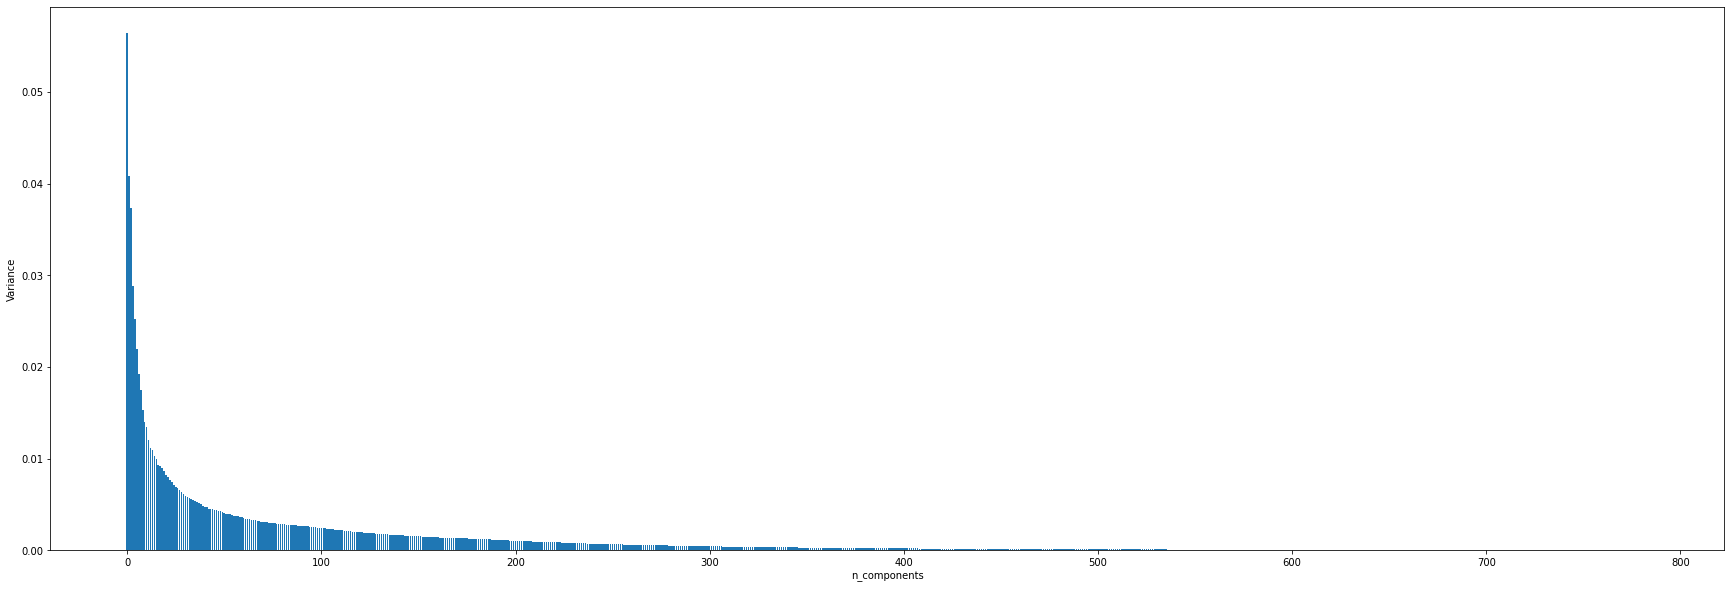

In [26]:
#Importing PCA library
from sklearn.decomposition import PCA as sklearnPCA

#If n_components is not set then all components are stored 
sklearn_pca = sklearnPCA().fit(A_train)
A_train_pca = sklearn_pca.transform(A_train)
X_test_pca = sklearn_pca.transform(X_test)

#Percentage of variance explained by each of the selected components.
#If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.
var_per = sklearn_pca.explained_variance_ratio_
cum_var_per = sklearn_pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(30,10))
ind = np.arange(len(var_per)) 
plt.bar(ind,var_per)
plt.xlabel('n_components')
plt.ylabel('Variance')

In [27]:
#Applying PCA for dimensional reduction
n_comp=len(cum_var_per[cum_var_per <= 0.90])
print("Keeping 90% Info with ",n_comp," components")
sklearn_pca = sklearnPCA(n_components=n_comp)
A_train_pca = sklearn_pca.fit_transform(A_train)
X_test_pca = sklearn_pca.transform(X_test)
print("Shape before PCA for Train: ",A_train.shape)
print("Shape after PCA for Train: ",A_train_pca.shape)
print("Shape before PCA for Test: ",X_test.shape)
print("Shape after PCA for Test: ",X_test_pca.shape)

Keeping 90% Info with  235  components
Shape before PCA for Train:  (60000, 784)
Shape after PCA for Train:  (60000, 235)
Shape before PCA for Test:  (10000, 784)
Shape after PCA for Test:  (10000, 235)


In [43]:
%%time
#Reapplying SVM 
from sklearn.svm import SVC
classifier_svm_pca = SVC(kernel = 'rbf', random_state = 0)
classifier_svc_pca = classifier_svm_pca.fit(A_train_pca, b_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



CPU times: user 4min 52s, sys: 146 ms, total: 4min 53s
Wall time: 4min 53s


In [44]:
%%time
#Predicting the values and comparing results with the actual values
y_pred_svc_pca = classifier_svc_pca.predict(X_test_pca)
print(np.concatenate((y_pred_svc.reshape(len(y_pred_svc_pca),1), y_test.reshape(len(y_test),1)),1))

[[7 7]
 [2 2]
 [1 1]
 ...
 [4 4]
 [5 5]
 [6 6]]
CPU times: user 58.3 s, sys: 4.8 ms, total: 58.3 s
Wall time: 58.4 s


In [45]:
#Classification Report of Random Forest Classifier
print(classification_report(y_test, y_pred_svc_pca))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.96      0.96      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.96      0.97      0.96       892
           6       0.98      0.97      0.98       958
           7       0.94      0.96      0.95      1028
           8       0.96      0.95      0.96       974
           9       0.97      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



#CNN: Convolution Neural Network



*  As our data is in the form of images made up of pixel i.e. ranges from 0 to 255 we need to covert these images into matrix and further prosess will make it ot apply the deseired models. 

*  Also the dimension of the training set is (6000,28,28). Convolutional neural network requre one more dimension so need to reshape the matrix




In [31]:
%%time
#Reshaping the train and test dataset to fit CNN
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train_cnn = keras.utils.to_categorical(y_train, num_classes = None)
y_test_cnn = keras.utils.to_categorical(y_test, num_classes = None)


X_train_cnn = X_train_cnn.astype('float32')
X_test_cnn = X_test_cnn.astype('float32')


print('X_train_cnn shape:', X_train_cnn.shape)
print('X_test_cnn shape:', X_test_cnn.shape)
print('No of data points in training set:', X_train_cnn.shape[0])
print('No of data points in testing set:', X_test_cnn.shape[0])

X_train_cnn shape: (60000, 28, 28, 1)
X_test_cnn shape: (10000, 28, 28, 1)
No of data points in training set: 60000
No of data points in testing set: 10000
CPU times: user 70.1 ms, sys: 0 ns, total: 70.1 ms
Wall time: 71.2 ms


Converts a class vector (integers) to binary class matri. A binary matrix representation of the input. The classes axis is placed last.

##Creating Model

In [32]:
%%time
#Assigning values to the parameters
batch_size = 128
num_classes = 10
epochs = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

CPU times: user 165 ms, sys: 15.9 ms, total: 181 ms
Wall time: 427 ms


In [33]:
%%time
#Fitting the model
hist = model.fit(X_train_cnn, y_train_cnn,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test_cnn, y_test_cnn))
print("The model has successfully trained")
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 162s 3ms/step - loss: 0.1887 - accuracy: 0.9421 - val_loss: 0.0444 - val_accuracy: 0.9843
Epoch 2/10
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0608 - accuracy: 0.9817 - val_loss: 0.0340 - val_accuracy: 0.9883
Epoch 3/10
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0438 - accuracy: 0.9871 - val_loss: 0.0293 - val_accuracy: 0.9893
Epoch 4/10
60000/60000 [==============================] - 164s 3ms/step - loss: 0.0364 - accuracy: 0.9889 - val_loss: 0.0302 - val_accuracy: 0.9896
Epoch 5/10
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0306 - accuracy: 0.9901 - val_loss: 0.0282 - val_accuracy: 0.9907
Epoch 6/10
60000/60000 [==============================] - 164s 3ms/step - loss: 0.0250 - accuracy: 0.9922 - val_loss: 0.0314 - val_accuracy: 0.9902
Epoch 7/10
60000/60000 [==============================] - 158s

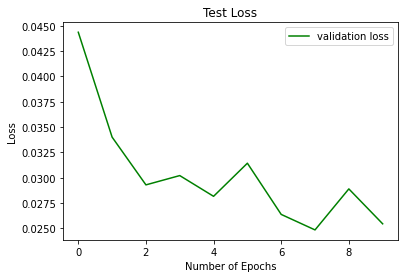

In [34]:
#Test loss graph over 10 epochs
plt.plot(hist.history['val_loss'], color='g', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

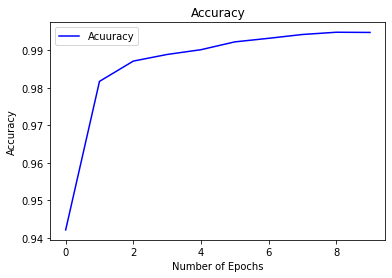

In [35]:
#Accuracy graph over 10 epochs
plt.plot(hist.history['accuracy'], color='b', label="Acuuracy")
plt.title("Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

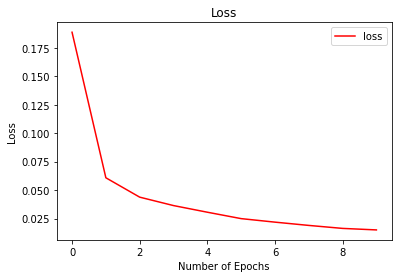

In [36]:
#loss graph over 10 epochs
plt.plot(hist.history['loss'], color='r', label="loss")
plt.title("Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Training the Model

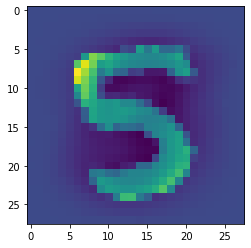

In [37]:
#Training over the test image
plt.imshow(X_test[120].reshape(28,28),interpolation='nearest')
plt.show()

In [38]:
#TO see the results
image = X_test[120]
test_img = image.reshape(1,28,28,1)

preds = model.predict(test_img)
print("The predicted number is: ",np.argmax(preds))

The predicted number is:  5


In [39]:
#Saving the model
model.save("MNISTMODEL2.hdf5")

In [46]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


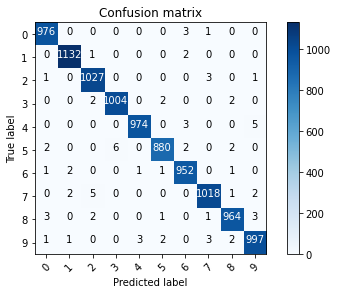

In [41]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset
Y_pred = model.predict(X_test_cnn)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test_cnn,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

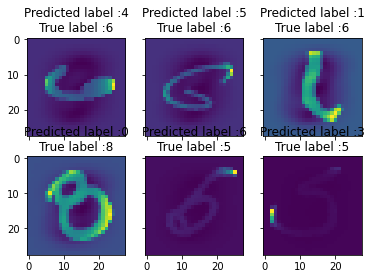

In [42]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_test_cnn[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)
